## Model Building for Regression

In [510]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score

In [3]:
df = pd.read_csv(r"D:\Innomatics\DataScience\Machine_Learning_(ML)\Projects\Model_building_for_Regression\src\mtcars.xlsx - mtcars.csv")

In [4]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [5]:
## Checking for missing values

In [6]:
df.isnull().sum()

mpg     0
cyl     0
disp    0
hp      0
drat    0
wt      0
qsec    0
vs      0
am      0
gear    0
carb    0
dtype: int64

In [7]:
## Checking the data types

In [8]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 2.9 KB


In [9]:
## Finding the outliers

In [11]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


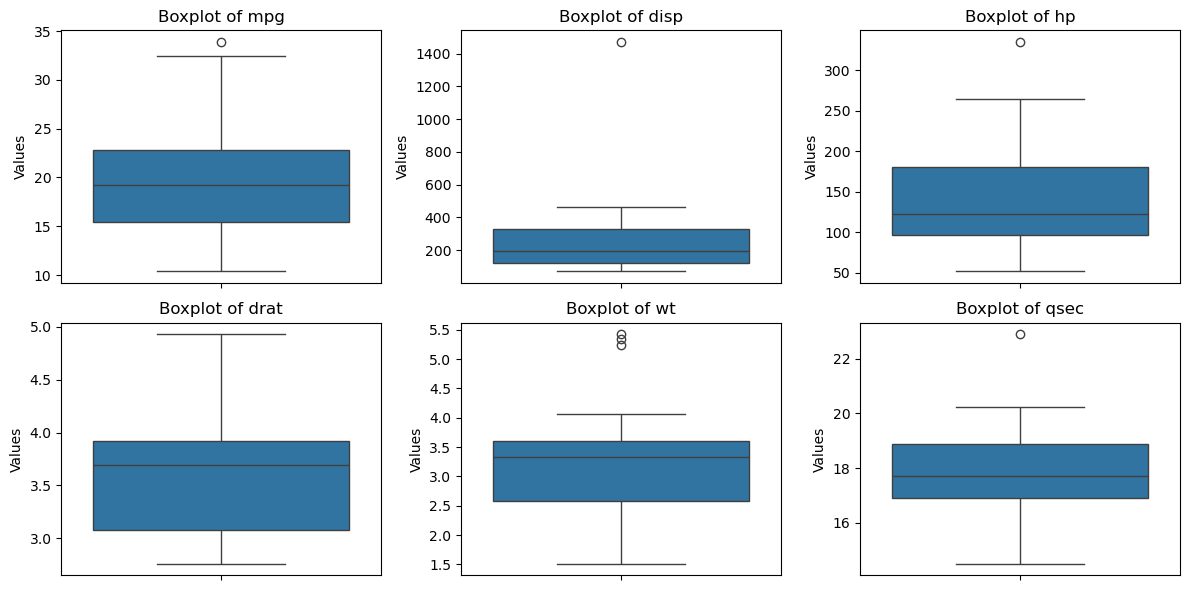

In [12]:
continuous_cols = ["mpg","disp","hp","drat","wt","qsec"]
plt.figure(figsize=(12,6))
for i,col in enumerate(continuous_cols,1):
    plt.subplot(2,3,i)
    sns.boxplot(df[col])
    plt.title(f"Boxplot of {col}")
    plt.ylabel("Values")
plt.tight_layout()
plt.show()

In [13]:
## From the data - our Dependent feature is "mpg", So imputing only the X features

In [14]:
outliers = {}.fromkeys(df["wt"] > 3.21)
outliers

{False: None, True: None}

In [15]:
## Impute Outiers

def impute_outliers(dataframe,column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    Upper_bound = Q3 + 1.5 * IQR
    ## Imputing
    outliers = df[df[column] > Upper_bound][column]
    replace_outliers = {}.fromkeys(outliers,Upper_bound)
    df[column] = df[column].replace(replace_outliers)
    print(f"Outliers - {outliers} replaced with {Upper_bound}")

    return dataframe

In [16]:
for i in continuous_cols:
    impute_outliers(df,i)

Outliers - 19    33.9
Name: mpg, dtype: float64 replaced with 33.8625
Outliers - 14    1472.0
Name: disp, dtype: float64 replaced with 633.7625
Outliers - 30    335
Name: hp, dtype: int64 replaced with 305.25
Outliers - Series([], Name: drat, dtype: float64) replaced with 5.18
Outliers - 14    5.250
15    5.424
16    5.345
Name: wt, dtype: float64 replaced with 5.153125
Outliers - 8    22.9
Name: qsec, dtype: float64 replaced with 21.91125


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

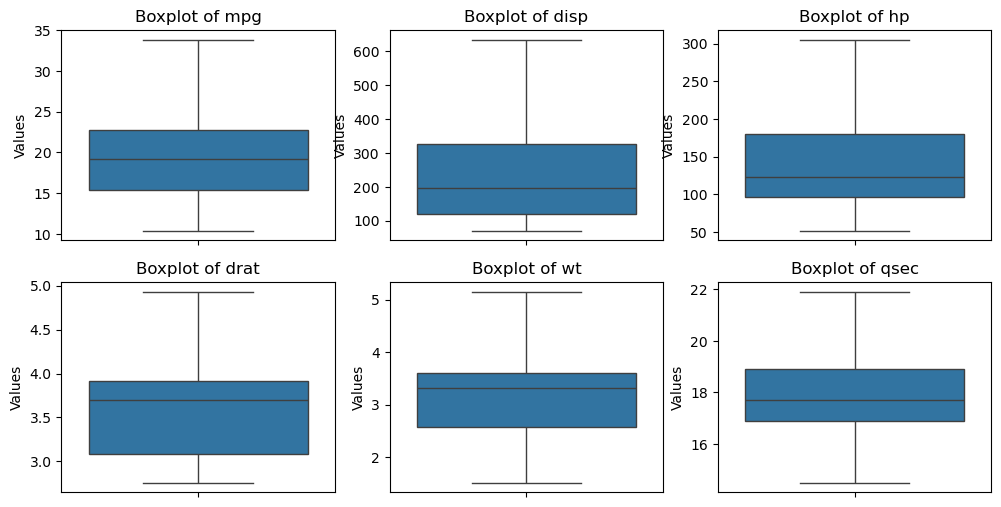

In [17]:
plt.figure(figsize=(12,6))
for i,col in enumerate(continuous_cols,1):
    plt.subplot(2,3,i)
    sns.boxplot(df[col])
    plt.title(f"Boxplot of {col}")
    plt.ylabel("Values")
plt.tight_layout

In [18]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110.0,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110.0,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93.0,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110.0,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175.0,3.15,3.440,17.02,0,0,3,2


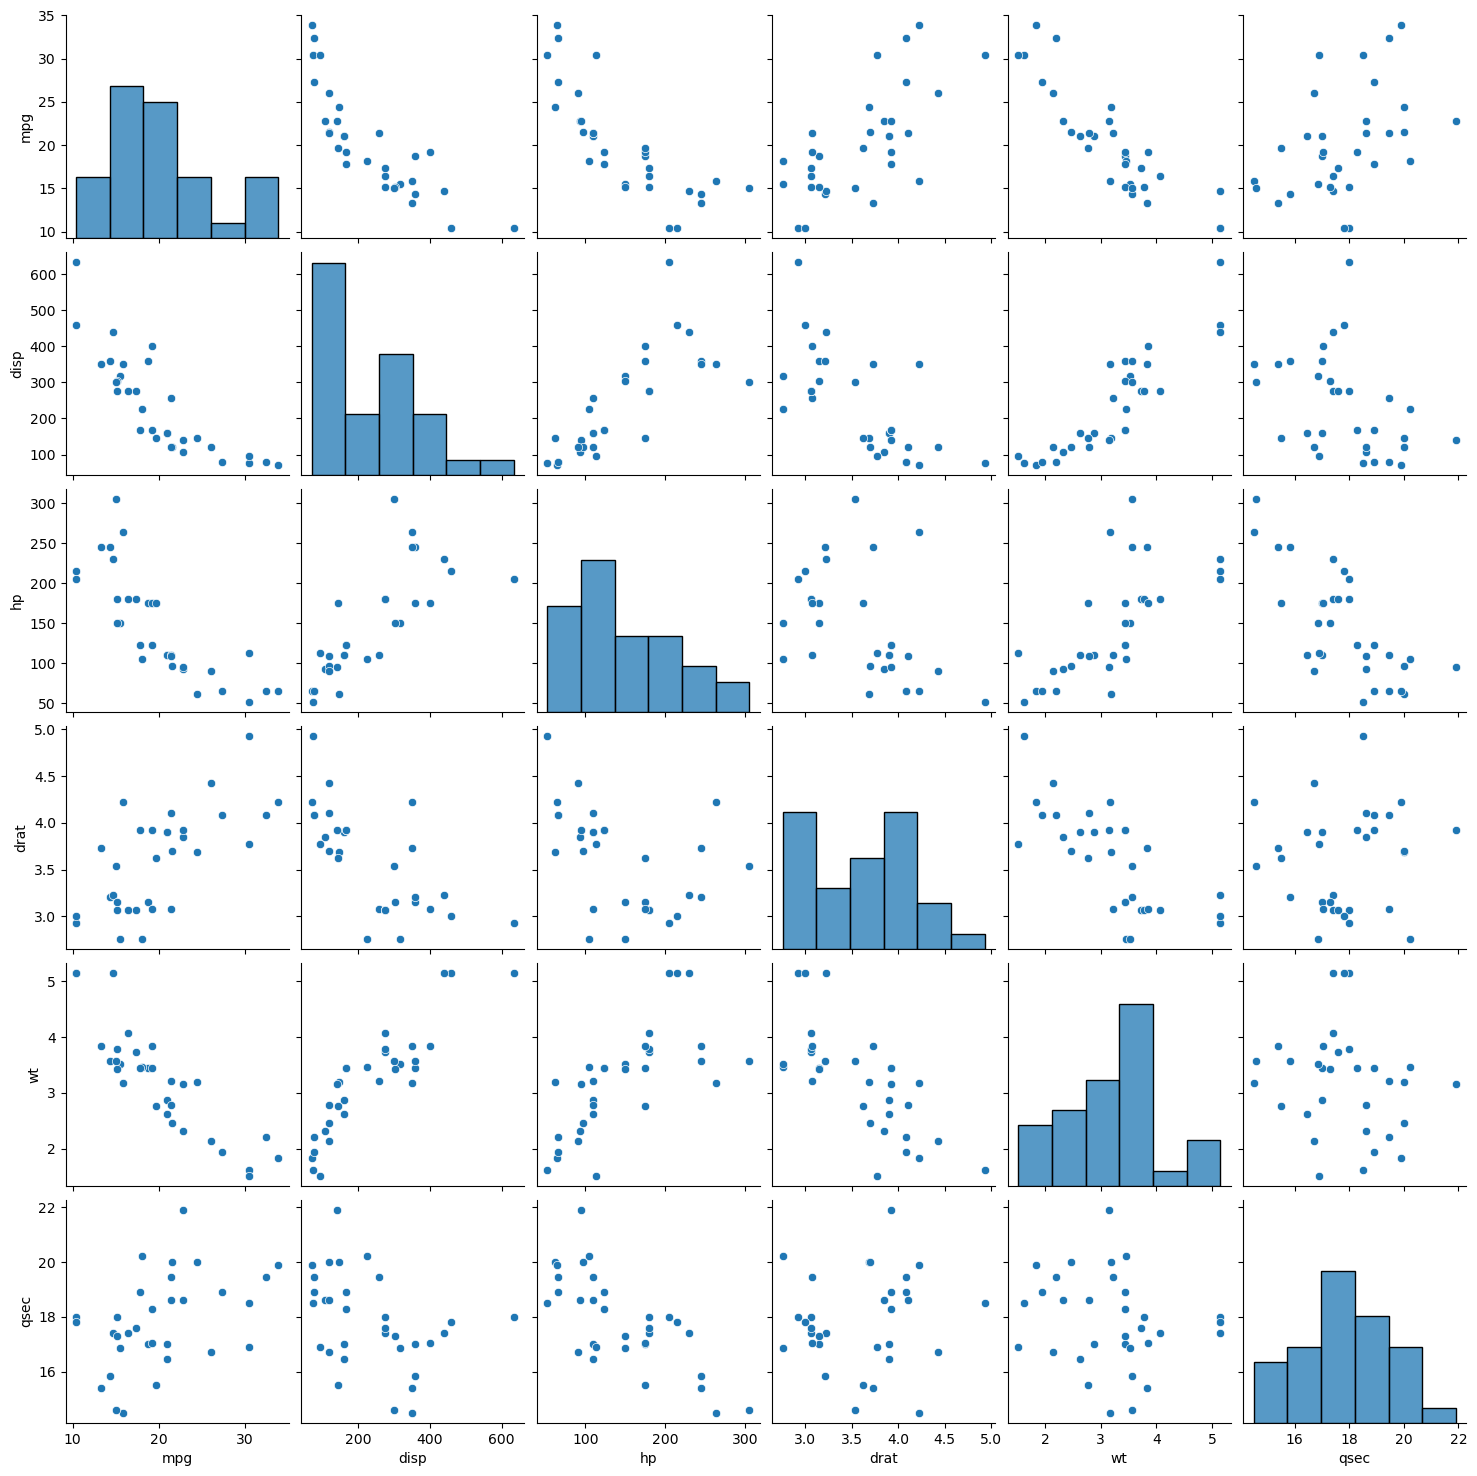

In [19]:
sns.pairplot(df,vars=["mpg","disp","hp","drat","wt","qsec"])
plt.show()

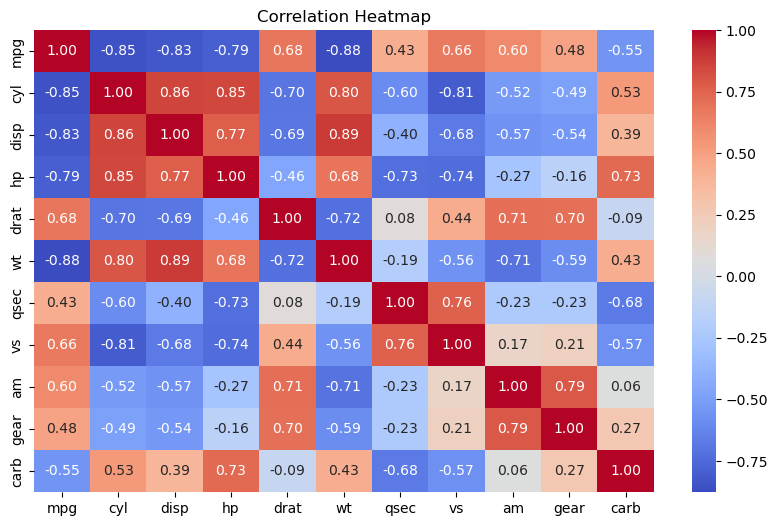

In [188]:
correlation_matrix = df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## Spliting train and test data

In [495]:
## Dropping disp - coz of muticolinearity with cyl

In [494]:
X = df.drop(columns=["mpg","disp","qsec"])
y = df["mpg"]

In [480]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [481]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((25, 8), (7, 8), (25,), (7,))

## Scaling

In [482]:
sc = StandardScaler()

In [483]:
X_train = sc.fit_transform(X_train)

In [484]:
X_test = sc.transform(X_test)

## Building model

In [500]:
mlr_model = LinearRegression()

In [501]:
mlr_model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [502]:
mlr_model.intercept_

np.float64(20.1665)

In [503]:
mlr_model.coef_

array([-0.41215784, -1.47767599,  0.70090478, -2.21939995,  0.23290942,
        0.27154724,  0.46335253, -0.6809039 ])

## Prediction

In [504]:
y_pred_test = mlr_model.predict(X_test)
y_pred_train = mlr_model.predict(X_train)

## Evalution

### Test data

In [505]:
test_mse = mean_squared_error(y_test,y_pred_test)
test_rmse = root_mean_squared_error(y_test,y_pred_test)
test_mae = mean_absolute_error(y_test,y_pred_test)
test_r2 = r2_score(y_test,y_pred_test)
print("Test data results -","\nMSE :",test_mse,"\nRMSE :",test_rmse,"\nMAE :",test_mae,"\nR2_score :",test_r2)

Test data results - 
MSE : 6.511682394671264 
RMSE : 2.55179983436618 
MAE : 1.759236417935337 
R2_score : 0.8371431297460765


### Train Data

In [506]:
train_mse = mean_squared_error(y_train,y_pred_train)
train_rmse = root_mean_squared_error(y_train,y_pred_train)
train_mae = mean_absolute_error(y_train,y_pred_train)
train_r2 = r2_score(y_train,y_pred_train)
print("Test data results -","\nMSE :",train_mse,"\nRMSE :",train_rmse,"\nMAE :",train_mae,"\nR2_score :",train_r2)

Test data results - 
MSE : 4.597842206693109 
RMSE : 2.1442579617884387 
MAE : 1.7184453137920166 
R2_score : 0.8638798980807025


In [507]:
print(f"TRAIN R-squared: {train_r2:.2f}")
print(f"TEST R-squared: {test_r2:.2f}")

TRAIN R-squared: 0.86
TEST R-squared: 0.84


## Saving the model

In [496]:
import joblib

In [508]:
mlr_model.sc = sc

In [509]:
joblib.dump(mlr_model,"mtcars_regression_model.pkl")

['mtcars_regression_model.pkl']